Make sure you use the right version number.

In [1]:
# Tutorial at:
# https://www.youtube.com/watch?v=0B5eIE_1vpU

# Code at:
# https://github.com/koaning/calm-notebooks/blob/master/scikit-learn

# Also can be found at:
# https://calmcode.io/scikit-learn/introduction.html

In [1]:
#!pip install --upgrade scikit-learn==0.23.0

Once installed, we can load the data.

In [2]:
#!pip show scikit-learn

In [3]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

# X, y = load_boston(return_X_y=True)

Next, we can apply models! 

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [9]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([2.826802, 2.1594  , 3.650404])

Maybe we should inspect the results.

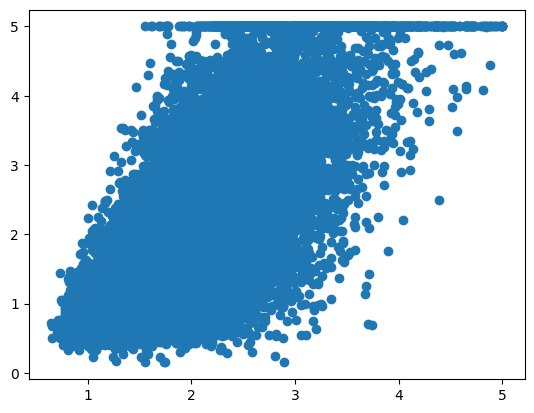

In [10]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import load_boston
import matplotlib.pylab as plt

# X, y = load_boston(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

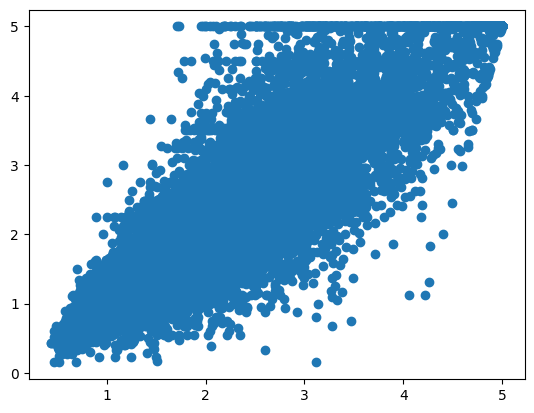

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

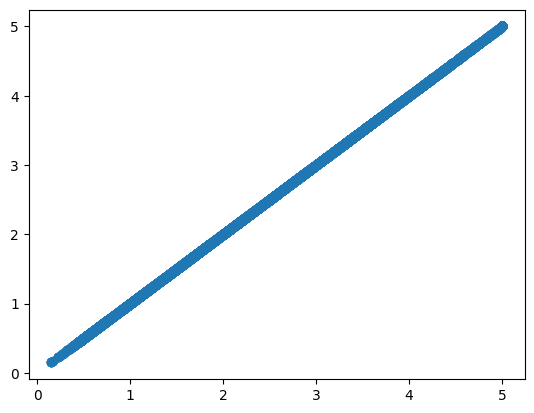

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={                                # parameters grid
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)   # cross validation - the dataset is split into 3 datasets
mod.fit(X, y);

In [14]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011530,0.000250,0.232246,0.020075,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.011412,0.000149,0.264456,0.020489,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.011451,0.000116,0.285374,0.021745,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.011283,0.000042,0.297758,0.021445,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.011489,0.000249,0.324775,0.039286,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.014378,0.002458,0.342800,0.020085,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.012176,0.000122,0.343135,0.024197,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.012110,0.000358,0.349798,0.021411,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.011928,0.000039,0.355795,0.022190,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.012504,0.000633,0.375861,0.035534,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


Finally, lets remember that we should look at the data.

In [16]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived